# Fremont Residential Market Analysis

## Feature Information:
- id: Unique ID for each single house
- dom: Date on market
- area: Area codes in Fremont
- lp: Listing price
- sp: Sold price
- sqft: House size in SqFt
- br: Number of bedroom
- bth: Number of full-bathroom
- pb: Number of partial-bathroom
- gar_sp: Number of garage space
- yr_blt: Year built
- lot_sqFt: The land size according to the survey of boundary lines determined by the city
- hoa_fee: Homeowner's association fee
- closing_date: The date when the transaction is officially done

## Section 2: Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
plt.style.use('seaborn-darkgrid')
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('Fremont_Sold_data_cleaned.csv')

In [3]:
print(df.head())

           id  dom  area       lp       sp  sqft  br  bth  pb  gar_sp  yr_blt  \
0    40843932   45  3700   848888   805000  1165   2    2   0       2    1976   
1    40844383   28  3700  1189000  1220000  1480   4    3   0       2    1958   
2    40844295   52  3700  1280000  1100000  1192   3    1   0       2    1954   
3  ML81728224   42  3700  1089950  1041515  1915   3    2   0       2    1958   
4    40843126   42  3700  1089950  1041515  1915   3    2   0       2    1958   

   lot_sqft  hoa_fee closing_date  
0      5916        0       1/2/19  
1      7875      150       1/2/19  
2      7735        0       1/2/19  
3      7700      150       1/3/19  
4      7700      150       1/3/19  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4061 entries, 0 to 4060
Data columns (total 14 columns):
id              4061 non-null object
dom             4061 non-null int64
area            4061 non-null int64
lp              4061 non-null int64
sp              4061 non-null int64
sqft            4061 non-null int64
br              4061 non-null int64
bth             4061 non-null int64
pb              4061 non-null int64
gar_sp          4061 non-null int64
yr_blt          4061 non-null int64
lot_sqft        4061 non-null int64
hoa_fee         4061 non-null int64
closing_date    4061 non-null object
dtypes: int64(12), object(2)
memory usage: 444.3+ KB


In [5]:
df.area.unique()

array([ 3700,  3500, 21101,  9915])

### Caregorize the features:
- 6 continuous features: LP, SP, SqFt, YrBlt, Lot SqFt, HOA Fee
- 5 discrete features: DOM, BR, Bth, PB, GarSp
- 1 categorical features: Area

### Checking Outliers

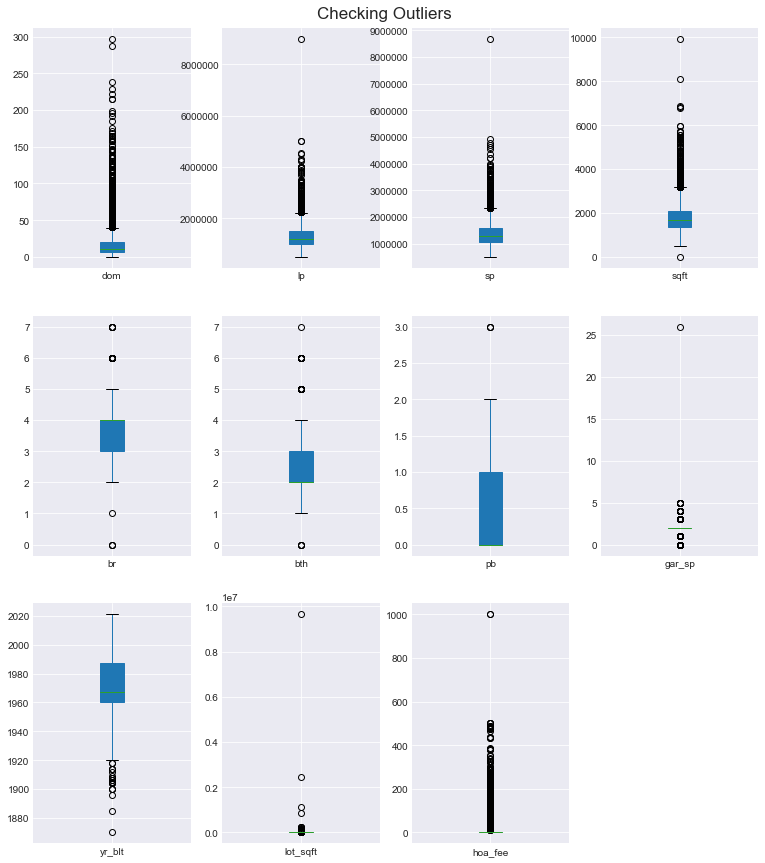

In [6]:
df_plot = df.drop(columns = ['id', 'area', 'closing_date'])

df_plot.plot(subplots = True, layout=(3, 4), kind='box', figsize=(13,15), patch_artist=True)
plt.suptitle('Checking Outliers', fontsize = 17, y=0.9)
plt.show()

- Every column has outliers. I will check the extreme values because they seem to be the rare transactions on the market, and drop the rare transactions.

In [7]:
df['lp'].describe()

count    4.061000e+03
mean     1.340441e+06
std      5.072277e+05
min      5.000000e+05
25%      1.000000e+06
50%      1.200000e+06
75%      1.489000e+06
max      8.998000e+06
Name: lp, dtype: float64

In [8]:
i_1 = df[((df.lp == df.lp.max()))].index

In [9]:
df = df.drop(i_1)

In [10]:
i_2 = df[((df['lot_sqft'] == df['lot_sqft'].max()))].index

In [11]:
df = df.drop(i_2)

In [12]:
# Create useful features
df.closing_date = pd.to_datetime(df.closing_date)

df['house_age'] = datetime.now().year - df.yr_blt
df['close_year'] = df.closing_date.dt.year
df['close_month'] = df.closing_date.dt.month
df['close_day'] = df.closing_date.dt.day
df['year_month'] = df.closing_date.dt.strftime('%Y-%m')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4059 entries, 0 to 4060
Data columns (total 19 columns):
id              4059 non-null object
dom             4059 non-null int64
area            4059 non-null int64
lp              4059 non-null int64
sp              4059 non-null int64
sqft            4059 non-null int64
br              4059 non-null int64
bth             4059 non-null int64
pb              4059 non-null int64
gar_sp          4059 non-null int64
yr_blt          4059 non-null int64
lot_sqft        4059 non-null int64
hoa_fee         4059 non-null int64
closing_date    4059 non-null datetime64[ns]
house_age       4059 non-null int64
close_year      4059 non-null int64
close_month     4059 non-null int64
close_day       4059 non-null int64
year_month      4059 non-null object
dtypes: datetime64[ns](1), int64(16), object(2)
memory usage: 634.2+ KB


In [14]:
df.describe()

,dom,area,lp,sp,sqft,br,bth,pb,gar_sp,yr_blt,lot_sqft,hoa_fee,house_age,close_year,close_month,close_day
count,4059.000000,4059.000000,4.059000e+03,4.059000e+03,4059.000000,4059.000000,4059.000000,4059.000000,4059.000000,4059.000000,4.059000e+03,4059.000000,4059.000000,4059.000000,4059.000000,4059.000000
mean,18.993594,3810.389751,1.337825e+06,1.394262e+06,1850.010347,3.620843,2.290712,0.280857,1.983493,1973.130081,8.423014e+03,36.572555,47.869919,2019.976349,6.704607,16.271249
std,25.591908,1425.836697,4.907050e+05,5.044469e+05,750.077407,0.758308,0.691596,0.469321,0.665619,19.101357,4.520007e+04,79.597171,19.101357,0.823468,3.076839,8.717181
min,0.000000,3500.000000,5.000000e+05,5.100000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,1870.000000,0.000000e+00,0.000000,0.000000,2019.000000,1.000000,1.000000
25%,7.000000,3700.000000,1.000000e+06,1.065000e+06,1376.000000,3.000000,2.000000,0.000000,2.000000,1960.000000,5.400000e+03,0.000000,34.000000,2019.000000,4.000000,9.000000
50%,10.000000,3700.000000,1.200000e+06,1.276000e+06,1668.000000,4.000000,2.000000,0.000000,2.000000,1967.000000,6.234000e+03,0.000000,54.000000,2020.000000,7.000000,16.000000
75%,20.000000,3700.000000,1.488944e+06,1.574500e+06,2096.000000,4.000000,3.000000,1.000000,2.000000,1987.000000,7.789000e+03,0.000000,61.000000,2021.000000,9.000000,24.000000
max,297.000000,21101.000000,4.999888e+06,4.925000e+06,8096.000000,7.000000,7.000000,3.000000,26.000000,2021.000000,2.448072e+06,1000.000000,151.000000,2021.000000,12.000000,31.000000


In [15]:
df.columns

Index(['id', 'dom', 'area', 'lp', 'sp', 'sqft', 'br', 'bth', 'pb', 'gar_sp',
       'yr_blt', 'lot_sqft', 'hoa_fee', 'closing_date', 'house_age',
       'close_year', 'close_month', 'close_day', 'year_month'],
      dtype='object')

### Date On Market Distribution

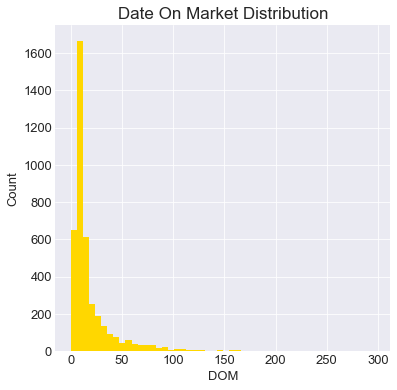

In [16]:
plt.figure(figsize=(6,6))

df.dom.hist(bins = 50, color = 'gold')
plt.title('Date On Market Distribution', fontsize=17)
plt.tick_params(axis='both', labelsize=13)
plt.xlabel('DOM', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.show()

- The histogram of 'date on market' shows a Right-Skewed distribution. 

In [17]:
mean_dom=df['dom'].mean()
median_dom=df['dom'].median()
mode_dom=df['dom'].mode().values[0]

print("Average date on market: " + str(mean_dom))
print("Median date on market: " + str(median_dom))
print("Most date on market: " + str(mode_dom))

Average date on market: 18.99359448139936
Median date on market: 10.0
Most date on market: 7


### Listing Price and Sold Price Distribution

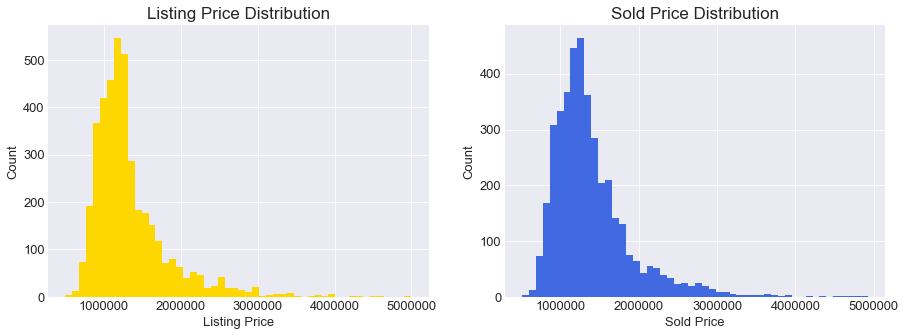

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

mean_l=df['lp'].mean()
median_l=df['lp'].median()
mode_l=df['lp'].mode().values[0]

mean_s=df['sp'].mean()
median_s=df['sp'].median()
mode_s=df['sp'].mode().values[0]

ax1.hist(df.lp, bins=50, color='gold')
ax1.set_title('Listing Price Distribution', fontsize=17)
ax1.set_xlabel('Listing Price', fontsize=13)
ax1.set_ylabel('Count', fontsize=13)
ax1.tick_params(axis='both', labelsize=13)

ax2.hist(df.sp, bins=50, color='royalblue')
ax2.set_title('Sold Price Distribution', fontsize=17)
ax2.set_xlabel('Sold Price', fontsize=13)
ax2.set_ylabel('Count', fontsize=13)
ax2.tick_params(axis='both', labelsize=13)

plt.show()

In [19]:
print("Average listing price: " + str(mean_l))
print("Median listing price: " + str(median_l))
print("Most listing price: " + str(mode_l))

Average listing price: 1337824.807834442
Median listing price: 1200000.0
Most listing price: 1100000


In [20]:
print("Average sold price: " + str(mean_s))
print("Median sold price: " + str(median_s))
print("Most sold price: " + str(mode_s))

Average sold price: 1394262.3968957872
Median sold price: 1276000.0
Most sold price: 1300000


In [21]:
print(df[['lp', 'sp']].describe().apply(lambda x: x.apply('{0:.0f}'.format)))

            lp       sp
count     4059     4059
mean   1337825  1394262
std     490705   504447
min     500000   510000
25%    1000000  1065000
50%    1200000  1276000
75%    1488944  1574500
max    4999888  4925000


- Both 'Listing price' and 'Sold price' are Right-Skewed (Positive Skewness).
- Right-Skewed distribution tells us that the mean(average) house price in Fremont is typically greater than the median and mode house price.

### House Size Distribution

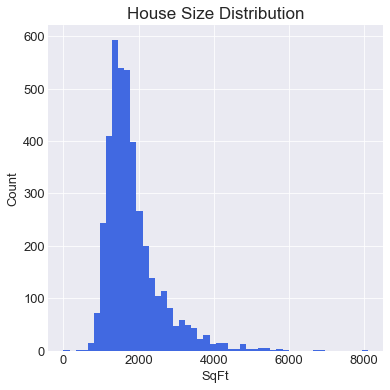

In [22]:
plt.figure(figsize=(6,6))

df.sqft.hist(bins = 50, color = 'royalblue')
plt.title('House Size Distribution', fontsize=17)
plt.tick_params(axis='both', labelsize=13)
plt.xlabel('SqFt', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.show()

In [23]:
mean_sqft=df['sqft'].mean()
median_sqft=df['sqft'].median()
mode_sqft=df['sqft'].mode().values[0]

print("Average house size in SqFt: " + str(mean_sqft))
print("Median house size in SqFt: " + str(median_sqft))
print("Most house size in SqFt: " + str(mode_sqft))

Average house size in SqFt: 1850.010347376201
Median house size in SqFt: 1668.0
Most house size in SqFt: 1148


### House Age Distribution

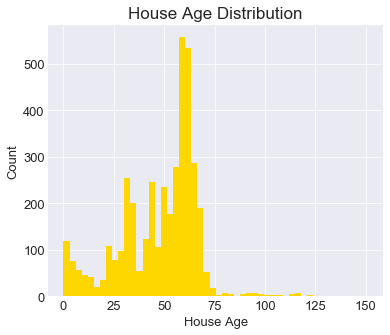

In [24]:
plt.figure(figsize=(6,5))

df.house_age.hist(bins = 50, color = 'gold')
plt.title('House Age Distribution', fontsize=17)
plt.tick_params(axis='both', labelsize=13)
plt.xlabel('House Age', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.show()

- Left-Skewed distribution
- Mode > Median > Mean

In [25]:
mean_house_age=df['house_age'].mean()
median_house_age=df['house_age'].median()
mode_house_age=df['house_age'].mode().values[0]

print("Average house age: " + str(mean_house_age))
print("Median house age: " + str(median_house_age))
print("Most house age: " + str(mode_house_age))

Average house age: 47.86991869918699
Median house age: 54.0
Most house age: 59


### Number of House in Each Area

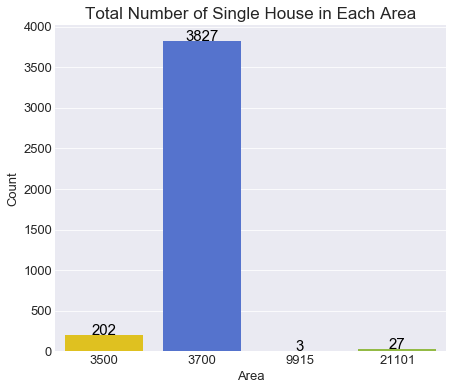

In [26]:
plt.figure(figsize=(7,6))
ax1 = sns.countplot(data = df, x = 'area', palette=['gold', 'royalblue', 'orange', 'yellowgreen'])

for p in ax1.patches:
    ax1.text(p.get_x()+p.get_width()/2., p.get_height()+0.2, p.get_height(), ha='center', color='black', size=15)

plt.title('Total Number of Single House in Each Area', fontsize=17)
plt.xlabel('Area', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.show()

- Above 90% of the houses belong to area 3700.